In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import fftpack
%pylab inline
plt.style.use('seaborn-whitegrid')
pylab.rcParams['figure.figsize'] = (22, 6)

Populating the interactive namespace from numpy and matplotlib


C:\Users\s158079\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['demean', 'mean', 'fftpack', 'datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [209]:
df = pd.read_csv('Data/BMS/Rooms and HVAC/RCU middenhal.csv', delimiter=';', encoding='utf-8')

In [210]:
df_temp = df[['Tijdstip', 'Gemiddelde ruimtetemp [°C] - RCU Middelhal 255 ()']]
df_temp.is_copy = False
df_temp.columns = ['Time', 'Temperature']

In [211]:
df_temp.is_copy = False
df_temp['Time'] = pd.to_datetime(df_temp['Time'], format="%d-%m-%Y %H:%M.%S")

df_temp['Temperature'] = [str(x).replace(',', '.') for x in df_temp['Temperature']]
df_temp['Temperature'] = pd.to_numeric(df_temp['Temperature'], errors='coerce')

In [212]:
df_temp.sort_values(['Time'], inplace=True)

In [213]:
df_temp = df_temp.loc[df_temp['Time'] > datetime.datetime(2017, 10, 23, 9, 0, 0)]
df_temp = df_temp.loc[df_temp['Time'] <= datetime.datetime(2018, 3, 8, 4, 52, 0)]

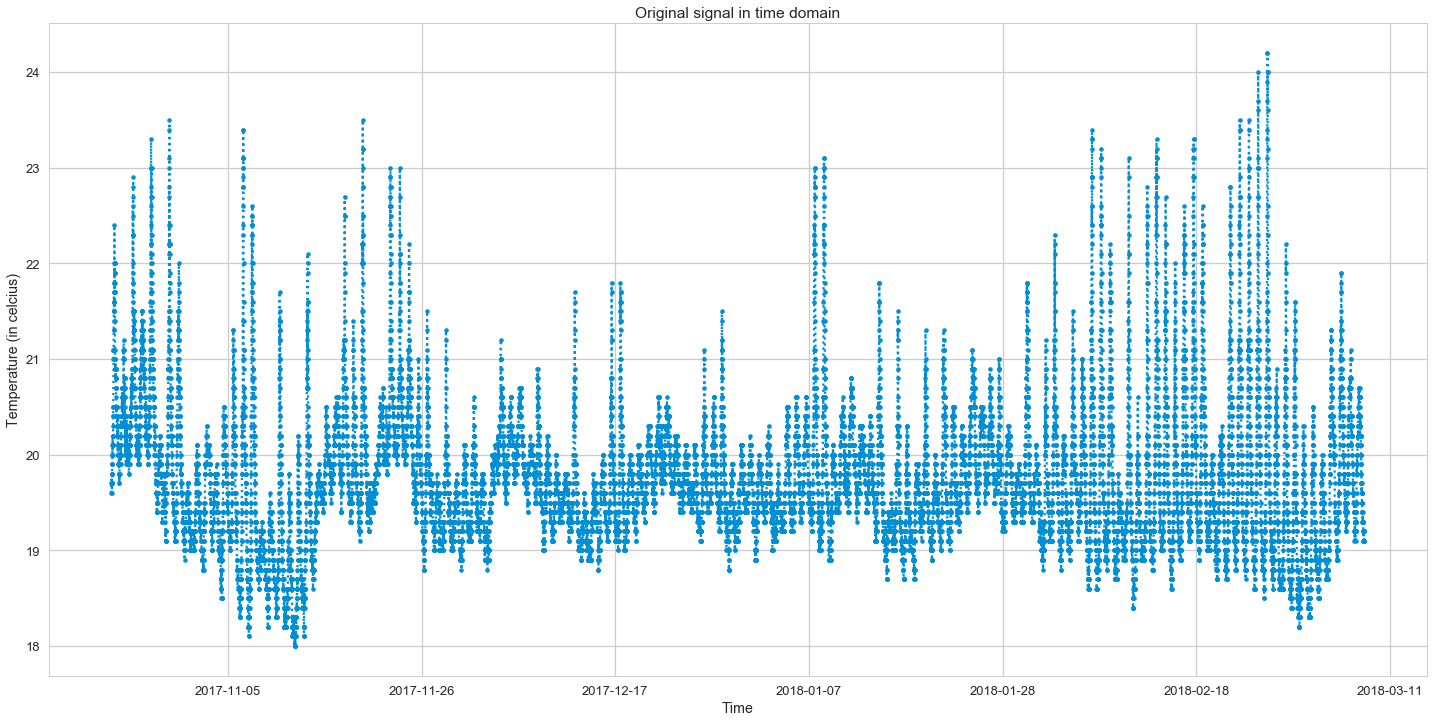

In [214]:
plt.plot(df_temp['Time'], df_temp['Temperature'], linestyle=':', marker='.')
plt.title('Original signal in time domain')
plt.xlabel('Time')
plt.ylabel('Temperature (in celcius)')
plt.show()

In [215]:
demean = lambda df: df - df.mean()
time = pd.DatetimeIndex(df_temp['Time'])
grouped = df_temp.groupby([time.year, time.month, time.day])

In [216]:
def normalize(row, mean):

    return (row - mean)/mean

def scale(row, mean):

    return (row - mean)

norm_df = pd.DataFrame()

for name, group in grouped:
    df_sub = pd.DataFrame(group)
    mean = df_sub['Temperature'].mean()

    df_sub['Temperature_normalized'] = df_sub.apply(lambda row: normalize(row['Temperature'], mean), axis=1)
    df_sub['Temperature_scaled'] = df_sub.apply(lambda row: scale(row['Temperature'], mean), axis=1)
    norm_df = norm_df.append(df_sub)

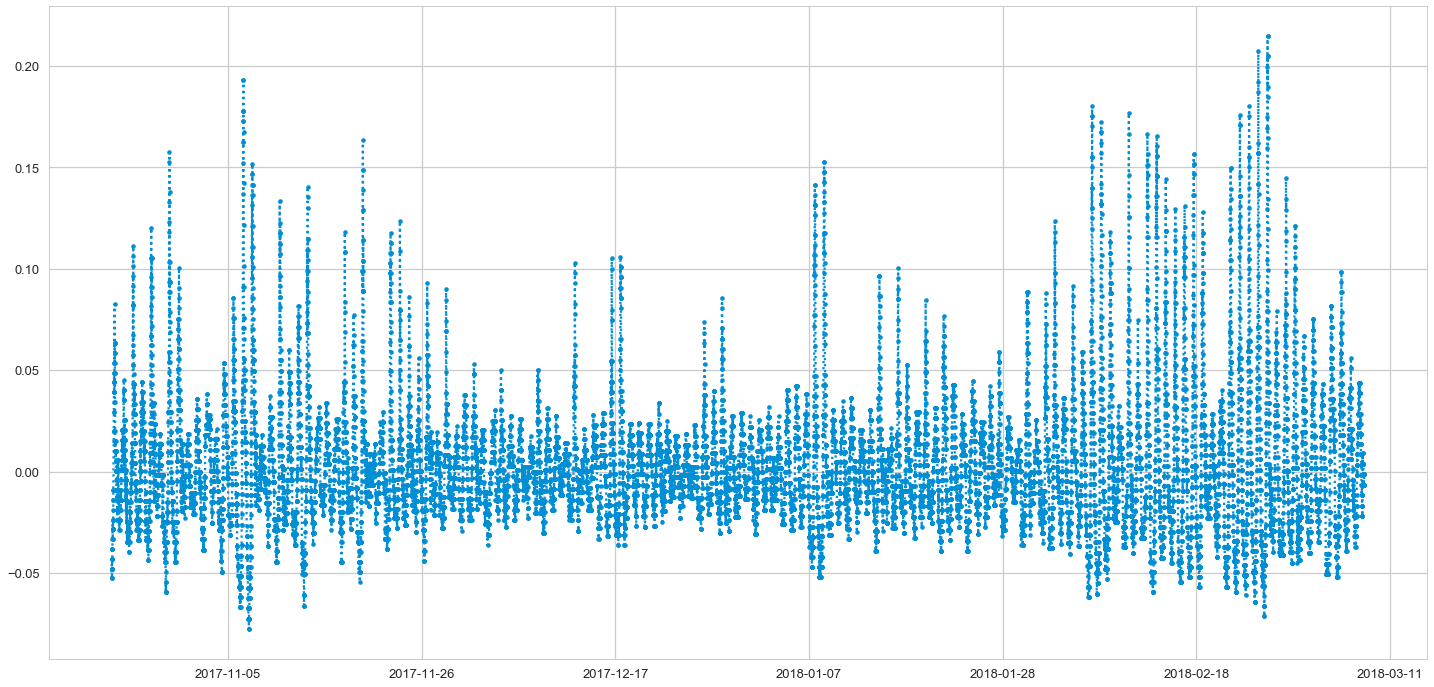

In [217]:
plt.plot(norm_df['Time'], norm_df['Temperature_normalized'], linestyle=':', marker='.')
plt.show()

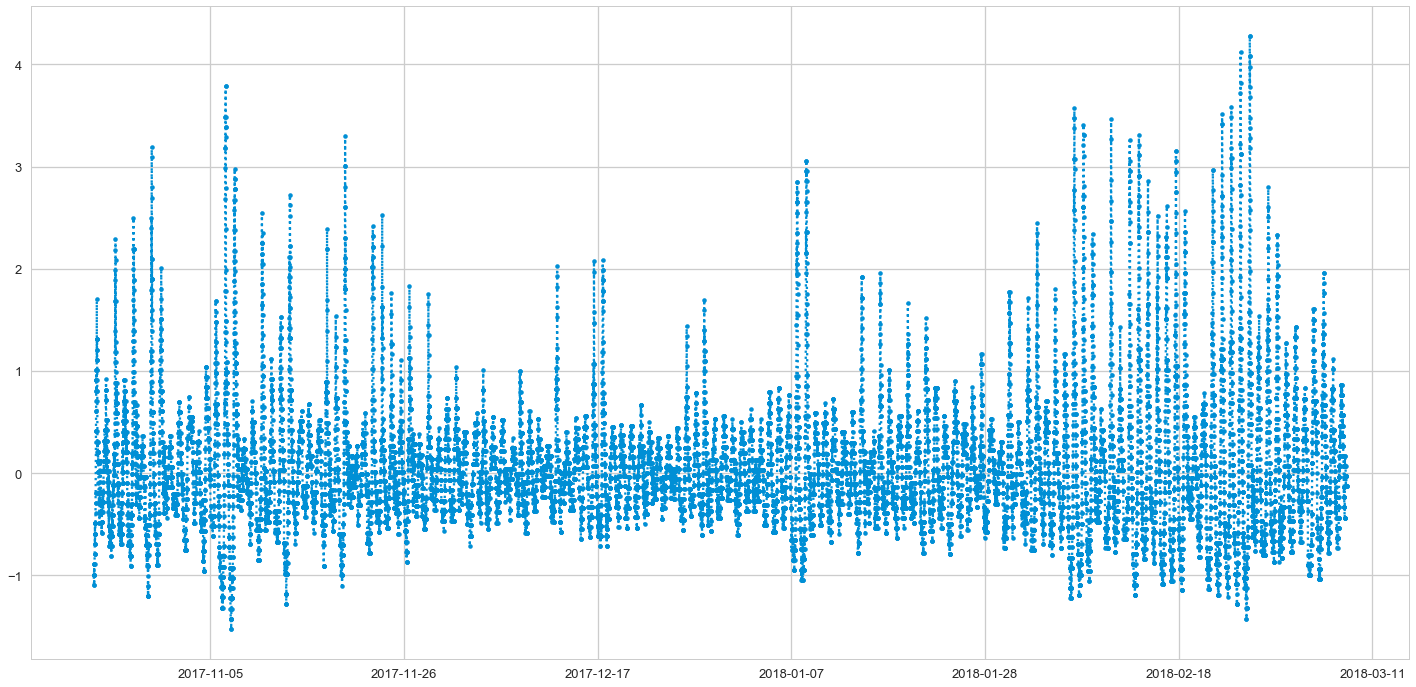

In [218]:
plt.plot(norm_df['Time'], norm_df['Temperature_scaled'], linestyle=':', marker='.')
plt.show()

In [219]:
X_temp_norm = np.fft.fft(norm_df['Temperature_normalized'])
X_temp_scaled = np.fft.fft(norm_df['Temperature_scaled'])

In [220]:
abs(X_temp_scaled)

array([  5.36815037e-12,   2.30938821e+01,   9.52021195e+00, ...,
         2.64091786e+01,   9.52021195e+00,   2.30938821e+01])

In [221]:
freqs_norm = np.fft.fftfreq(len(norm_df['Temperature_normalized'])) * (1/480)
freqs_scaled = np.fft.fftfreq(len(norm_df['Temperature_scaled'])) * (1/480)

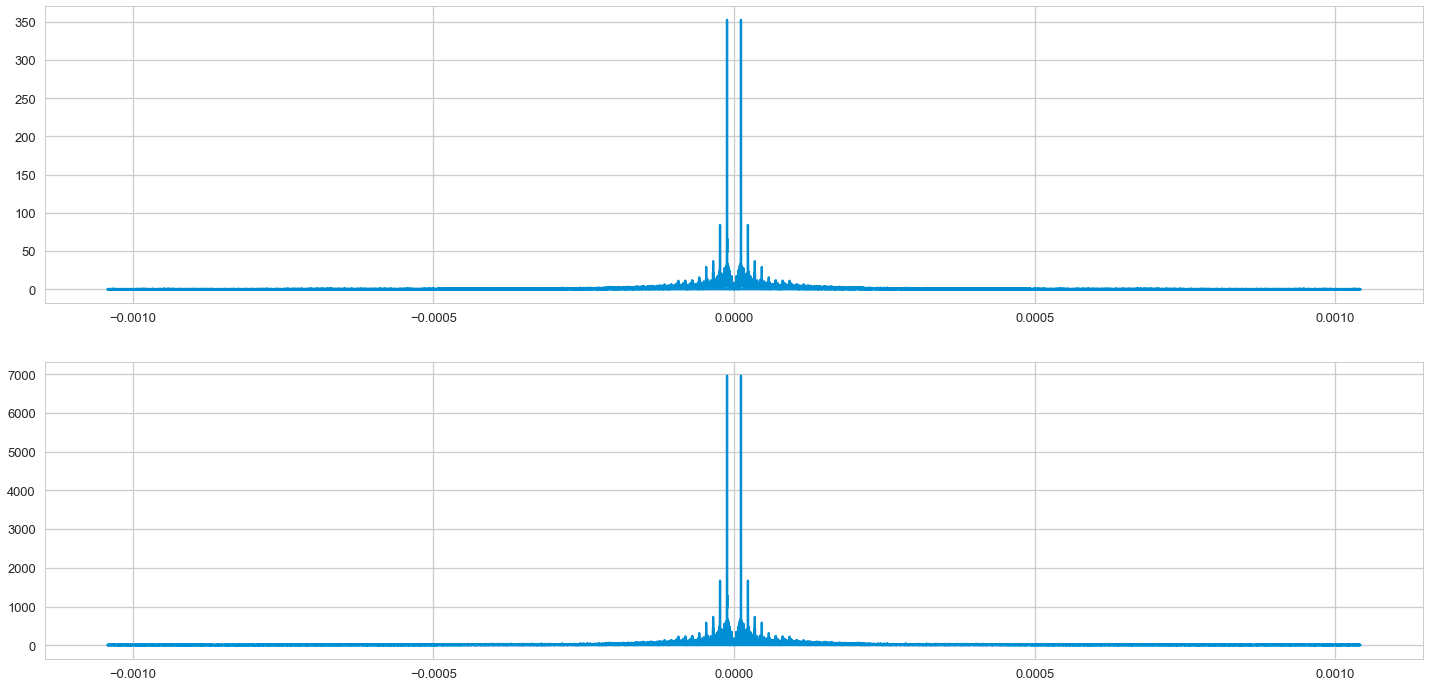

In [222]:
pylab.rcParams['figure.figsize'] = (22, 12)
plt.subplot(211)
plt.plot(freqs_norm, abs(X_temp_norm))
plt.subplot(212)
plt.plot(freqs_scaled, np.abs(X_temp_scaled))

In [161]:
len(freqs_scaled)/2

12587.0

In [223]:
def dft_map(X, Fs, shift=True):
    resolution = float(Fs) / len(X)
    if shift:
        n, Y = dft_shift(X)
    else:
        Y = X
        n = np.arange(0, len(Y))
    f = n * resolution
    return f, Y

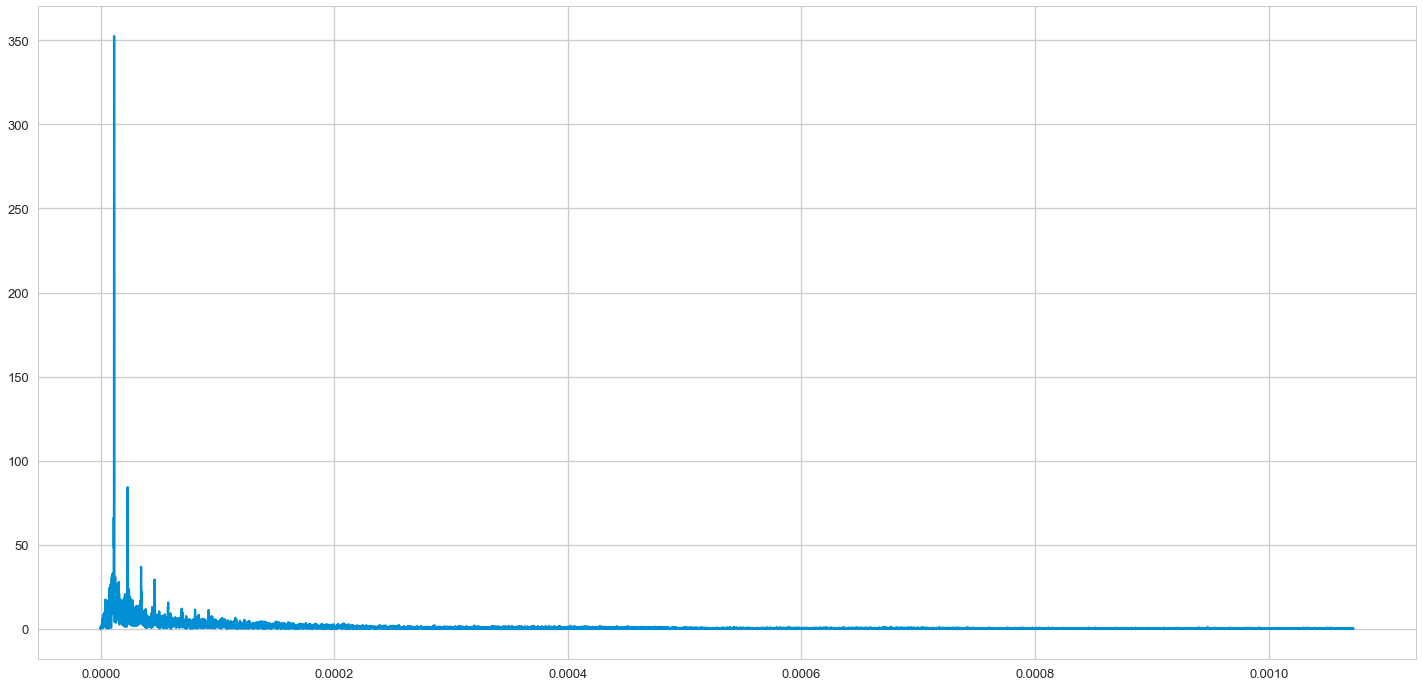

In [224]:
f, y = dft_map(X_temp_norm, 1/480, shift=False)
plt.plot(f[:12587], abs(y[:12587]));

In [225]:
X_temp_norm_new = [k  if abs(k) > 250 else 0 for k in X_temp_norm]

In [226]:
x_orig = np.fft.ifft(X_temp_norm_new)

C:\Users\s158079\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


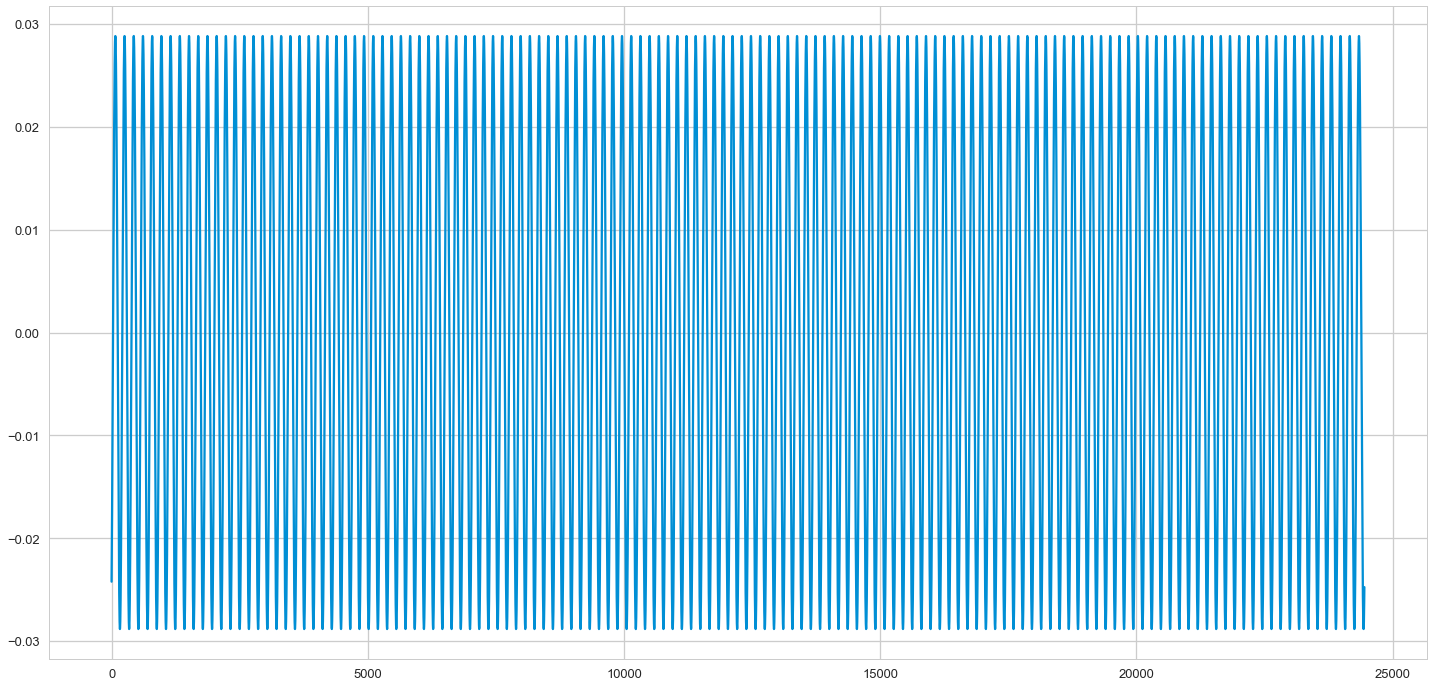

In [227]:
plt.plot(x_orig)

In [242]:
new_t = [(m*480)/(60*60*24) for m in range(len(x_orig))]

C:\Users\s158079\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


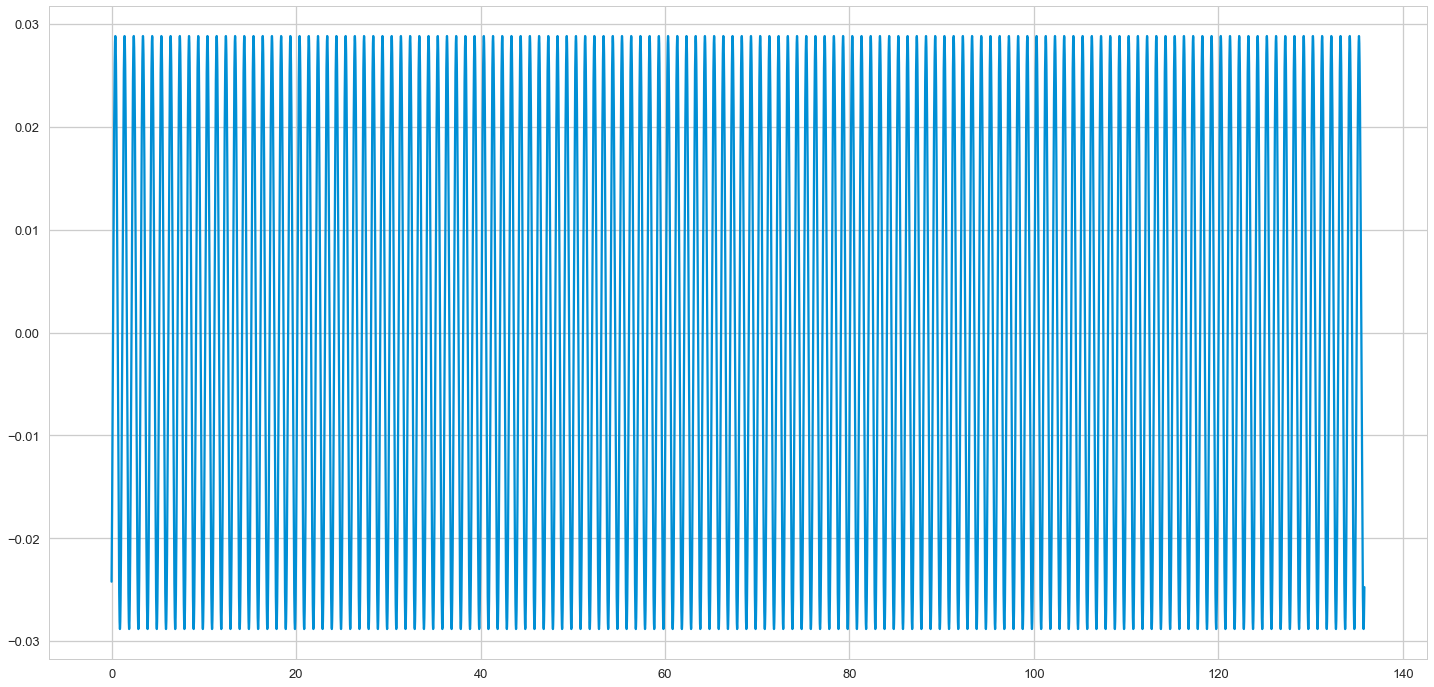

In [243]:
plt.plot(new_t, x_orig)

In [134]:
x_filtered = [i for i in X if abs(i)<5]

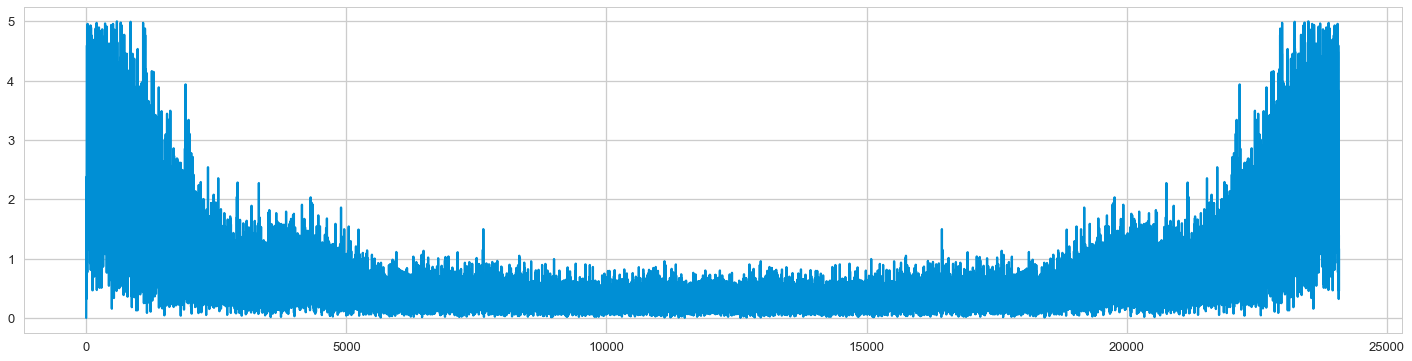

In [135]:
plot(np.abs(x_filtered))

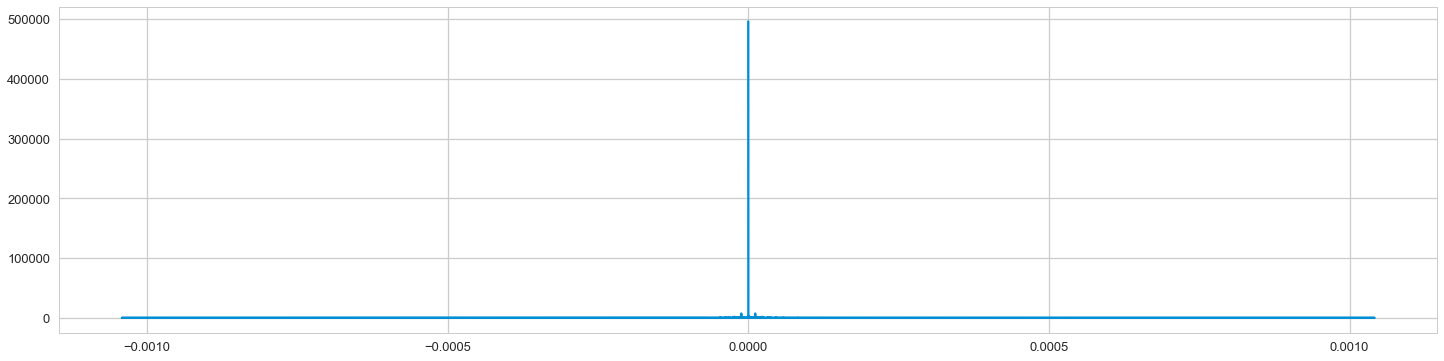

In [140]:
plt.plot(freqs, abs(X))

In [ ]:
# plt.stem(freqs, np.abs(X))

In [114]:
print(len(np.abs(X))/2)

12587.0
